In [1]:
# Outliers in target variable? 

#  It depends. If you have enough training data available, you can choose to discard the outliers. But usually, it would 
# be a good idea to look at the data and decide the cause of the outlier before taking any action.

# I believe dropping data is always a harsh step, and it should be taken only in extreme conditions when we’re sure that 
# the outlier is either a measurement/data entry error (it is not always known in the generic case though) or the artifact 
# to suboptimal sampling your training data

# Before removing the outliers attributable to the measurement/data entry error, try to correct the error if possible 
# (before you drop the respective outlier)

# If the extreme (outlier) value is a legitimate observation that is a natural part of the population you’re studying, 
# you should leave it in the training dataset

# Whenever you decide to remove outliers, it would be nice to document the excluded data points as well as explain your 
# reasoning. You must be able to attribute a specific cause for removing outliers.

# Another approach is to perform the analysis with and without these observations and discuss the differences. Comparing 
# results in this manner is particularly useful when you’re unsure about removing an outlier and when there is substantial 
# disagreement within a group over this question.

# Last but not least, there are some good statistical and ML algorithms that can handle outliers in data solidly. If you 
# decide to engage with one of such algorithms in your ML experiments down the road, you can soften your outlier removal / 
# data correcting approach.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the general dataset

HOutliers = pd.read_csv(r"Height-01.csv", header=0)
HOutliers.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
# Display the dataset information

HOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [4]:
# Display the shape of the dataset

HOutliers.shape

(10000, 2)

In [5]:
# Display "Descriptive Statistical Analysis"

HOutliers.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


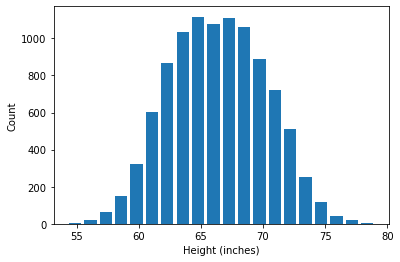

In [6]:
# Plot Histogram

plt.hist(HOutliers.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

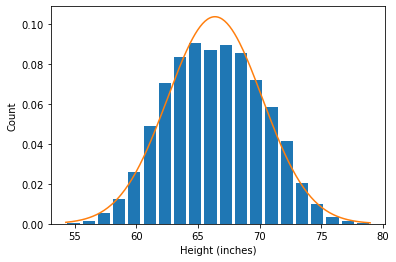

In [7]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(HOutliers.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(HOutliers.Height.min(), HOutliers.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, HOutliers.Height.mean(),HOutliers.Height.std()))

In [8]:
# Calculate the standard deviation

HOutliers.Height.std()

3.847528120795573

In [9]:
# Calculat upper limit as  "Upper Limit = mean + 3 * std"

upper_limit = round(HOutliers.Height.mean() + 3 * HOutliers.Height.std(),3)
upper_limit

77.91

In [10]:
# Calculat Lower limit as "Lower Limit = mean - 3 * std" 

lower_limit = round(HOutliers.Height.mean() - 3 * HOutliers.Height.std(), 3)
lower_limit

54.825

In [11]:
print(HOutliers.Height.min())
print(HOutliers.Height.max())

54.26313333
78.99874235


In [12]:
#hll = round(HOutliers.Height.mean() - 3 * HOutliers.Height.std(), 3)
#hul = round(HOutliers.Height.mean() + 3 * HOutliers.Height.std(),3)
#wll = round(HOutliers.Weight.mean() - 3 * HOutliers.Weight.std(), 3)
#wul = round(HOutliers.Weight.mean() + 3 * HOutliers.Weight.std(),3)
#fll = round(HOutliers.fat.mean() - 3 * HOutliers.fat.std(), 3)
#ful = round(HOutliers.fat.mean() + 3 * HOutliers.fat.std(),3)
#bll = round(HOutliers.BMI.mean() - 3 * HOutliers.BMI.std(), 3)
#bul = round(HOutliers.BMI.mean() + 3 * HOutliers.BMI.std(),3)

In [13]:
# Display the outlier in the dataset

HOutliers[(HOutliers.Height > upper_limit) | (HOutliers.Height < lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [14]:
54.26313333
78.99874235

78.99874235

In [15]:
# Eliminate the outlier and write data to new file

HOutliers_new = HOutliers[(HOutliers.Height > lower_limit) & (HOutliers.Height < upper_limit)]
HOutliers_new.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [16]:
#HOutliers_new = HOutliers[(HOutliers.Height>lower_limit) & (HOutliers.Height<upper_limit)]
#HOutliers_new = HOutliers_new[(HOutliers.Weight>lower_limit) & (HOutliers.Weight<upper_limit)]
#HOutliers_new = HOutliers_new[(HOutliers.fat>lower_limit) & (HOutliers.fat<upper_limit)]
#HOutliers_new = HOutliers_new[(HOutliers.BMI>lower_limit) & (HOutliers.BMI<upper_limit)]
#HOutliers_new.head()

In [17]:
HOutliers_new.shape

(9993, 2)

In [18]:
HOutliers.shape[0] - HOutliers_new.shape[0]

7

In [19]:
HOutliers_new.shape[0]

9993

# Method -02 => Z Score

In [20]:
# Outlier detection and remove by using Z score (-3 to +3)
# Z score indicate how many standard deviation away a data point is
# Calculate the Z score = (X - m)/Sigma, where m = mean, Sigma = standard deviation

HOutliers['ZScore'] = (HOutliers.Height - HOutliers.Height.mean()) / HOutliers.Height.std()
HOutliers_new2 = HOutliers[(HOutliers.ZScore>-3) & (HOutliers.ZScore<3)]
HOutliers.shape[0] - HOutliers_new2.shape[0]

7

In [21]:
#HOutliers['H_ZScore'] = (HOutliers.Height - HOutliers.Height.mean()) / HOutliers.Height.std()
#HOutliers_new2 = HOutliers[(HOutliers.H_ZScore>-3) & (HOutliers.H_ZScore<3)]
#HOutliers['W_ZScore'] = (HOutliers.Weight - HOutliers.Weight.mean()) / HOutliers.Weight.std()
#HOutliers_new2 = HOutliers_new2[(HOutliers.W_ZScore>-3) & (HOutliers.W_ZScore<3)]
#HOutliers['W_ZScore'] = (HOutliers.Weight - HOutliers.Weight.mean()) / HOutliers.Weight.std()
#HOutliers_new2 = HOutliers_new2[(HOutliers.W_ZScore>-3) & (HOutliers.W_ZScore<3)]
#HOutliers['W_ZScore'] = (HOutliers.Weight - HOutliers.Weight.mean()) / HOutliers.Weight.std()
#HOutliers_new2 = HOutliers_new2[(HOutliers.W_ZScore>-3) & (HOutliers.W_ZScore<3)]

In [22]:
HOutliers_new2.head()

,Gender,Height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [23]:
HOutliers[HOutliers['ZScore']>3]

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [24]:
HOutliers[HOutliers['ZScore']<-3]

,Gender,Height,ZScore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [25]:
HOutliers[(HOutliers.ZScore >3) | (HOutliers.ZScore<-3)]

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [26]:
HOutliers_new3 = HOutliers[(HOutliers.ZScore>-3) & (HOutliers.ZScore<3)]
HOutliers_new3.head()

,Gender,Height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [27]:
HOutliers.shape[0] - HOutliers_new3.shape[0]

7

# Method - 3 => Box plot

<AxesSubplot:xlabel='Height'>

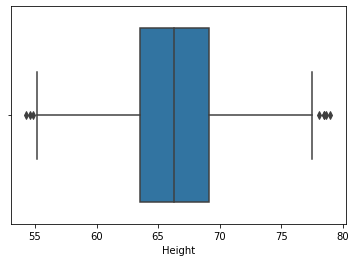

In [28]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HOutliers["Height"])

In [29]:
# Calculating the Q1, Q3 and Inter quartile range (IQR) 

first_quantile = HOutliers["Height"].quantile(.25)
third_quantile = HOutliers["Height"].quantile(.75)
IQR = third_quantile - first_quantile

In [30]:
# Calculate the Upper bound

Upper_bound = round(third_quantile + 1.5 * IQR, 3)
Upper_bound

77.677

In [31]:
Lower_bound = round(first_quantile - 1.5 * IQR, 3)
Lower_bound

55.003

In [32]:
HOutliers_new4 = HOutliers[(HOutliers.Height < Lower_bound) | (HOutliers.Height > Upper_bound)]
HOutliers_new4

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027


In [33]:
# Calculate the lower bound

Lower_bound = round(first_quantile - 1.5 * IQR, 3)
Lower_bound

55.003

In [34]:
HOutliers_new4 = HOutliers[(HOutliers.Height>Lower_bound) & (HOutliers.Height<Upper_bound)]
HOutliers_new4

,Gender,Height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [35]:
HOutliers.shape[0] - HOutliers_new4.shape[0]

8

In [36]:
# Load the general dataset

HWData = pd.read_csv(r"D:\00 Datasets\Others\Data-01\HeightWeight V1.0.csv", header=0)
HWData.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\00 Datasets\\Others\\Data-01\\HeightWeight V1.0.csv'

In [ ]:
Q1 = HWData.quantile(0.25)
Q3 = HWData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
### Outlier the weight

# load the Health Insurance dataset 

HealthIns = pd.read_csv(r"C:\Users\Raju\IIIT-Kurnool\Health_Insurance.csv", header=0) 
HealthIns.head()

In [37]:
# Outlier detetion and remove by using Z score
# Z score indicate how many standard deviation away a data point is
# Calculate the Z score = (X - m)/Sigma, where m = mean, Sigma = standard deviation

HealthIns['ZScore'] = (HealthIns.Expenses - HealthIns.Expenses.mean()) / HealthIns.Expenses.std()
HealthIns_new2 = HealthIns[(HealthIns.ZScore>-3) & (HealthIns.ZScore<3)]

NameError: name 'HealthIns' is not defined

In [34]:
HealthIns_new2.shape

(1331, 8)

In [35]:
HealthIns.shape

(1338, 8)

In [36]:
HealthIns = HealthIns_new2

In [37]:
HealthIns.shape

(1331, 8)

In [38]:
HealthIns.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses,ZScore
0,19,2,27.9,0,1,4,16884.92,0.298472
1,18,1,33.8,1,0,3,1725.55,-0.953333
2,28,1,33.0,3,0,3,4449.46,-0.728402
3,33,1,22.7,0,0,2,21984.47,0.719574
4,32,1,28.9,0,0,2,3866.86,-0.776511


In [39]:
HealthIns = HealthIns.drop(['ZScore'], axis = 1)
HealthIns.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,2,27.9,0,1,4,16884.92
1,18,1,33.8,1,0,3,1725.55
2,28,1,33.0,3,0,3,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [61]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in HealthIns.columns:
    if col != 'Expenses':
        IndepVar.append(col)

TargetVar = 'Expenses'

x1 = HealthIns[IndepVar]
y1 = HealthIns[TargetVar]

In [53]:
from sklearn.model_selection import train_test_split 

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [62]:
# Split the data into train and test

#from sklearn.model_selection import train_test_split 

#x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42,
#                                                        stratify=HealthIns[['Region', 'Smoker', 'Gender']])

In [63]:
x1_train.head()

,Age,Gender,BMI,Children,Smoker,Region
215,41,2,37.1,2,0,4
718,51,2,36.7,2,0,2
367,42,2,25.0,2,0,2
1176,52,2,24.1,1,1,2
64,20,2,22.4,0,1,2


In [64]:
# Train the algorithm and build the model with train dataset

from sklearn.linear_model import LinearRegression

mulreg1 = LinearRegression()  
mulreg1.fit(x1_train, y1_train) 

LinearRegression()

In [65]:
# Predict the model with test dataset

y_pred1 = mulreg1.predict(x1_test)

In [66]:
# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y1_test, y_pred1),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y1_test, y_pred1),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y1_test, y_pred1), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y1_test, y_pred1),3))

Mean Absolute Error (MAE): 3881.828
Mean Squared Error (MSE): 33537491.562
Root Mean Squared Error (RMSE): 5791.156
Mean Absolute Percentage Error (MAPE): 40.400000000000006 %
R2_score: 0.724


In [ ]:
Mean Absolute Error (MAE): 4162.539
Mean Squared Error (MSE): 35483534.737
Root Mean Squared Error (RMSE): 5956.806
Mean Absolute Percentage Error (MAPE): 38.4 %
R2_score: 0.766